<a href="https://colab.research.google.com/github/Communist02/BIN-22-1_Mazur_Denis_AI/blob/main/z3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1: Загрузка библиотек и предобратка данных

In [15]:
!pip install pandas scikit-learn seaborn scipy

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [17]:
# Загрузка набора данных
df = pd.read_csv('diamond.csv')

In [18]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [19]:
df['is_best_diamond'] = np.where(df['Cut'] == 'Signature-Ideal', 1, 0)
df.is_best_diamond = df.is_best_diamond.astype('category')
df.Color = df.Color.astype('category')
df.Clarity = df.Clarity.astype('category')
df.Polish = df.Polish.astype('category')
df.Symmetry = df.Symmetry.astype('category')
df.Report = df.Report.astype('category')

In [20]:
Y = df['is_best_diamond'] # выбираем целевую переменную (категориальную)
X = df.drop('is_best_diamond', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('Cut', axis=1)

In [21]:
df.drop('Cut', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Carat Weight     6000 non-null   float64 
 1   Color            6000 non-null   category
 2   Clarity          6000 non-null   category
 3   Polish           6000 non-null   category
 4   Symmetry         6000 non-null   category
 5   Report           6000 non-null   category
 6   Price            6000 non-null   int64   
 7   is_best_diamond  6000 non-null   category
dtypes: category(6), float64(1), int64(1)
memory usage: 130.2 KB


In [22]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,is_best_diamond
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,0
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,1


## 2: масштабирование признаков

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Carat Weight  6000 non-null   float64 
 1   Color         6000 non-null   category
 2   Clarity       6000 non-null   category
 3   Polish        6000 non-null   category
 4   Symmetry      6000 non-null   category
 5   Report        6000 non-null   category
 6   Price         6000 non-null   int64   
dtypes: category(5), float64(1), int64(1)
memory usage: 124.3 KB


In [24]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [25]:
X_processed

,Carat Weight,Price,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,5169,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,0.83,3470,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
2,0.85,3183,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0.91,4370,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
4,0.83,3171,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,6250,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5996,1.00,5328,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5997,1.02,6157,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5998,1.27,11206,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [26]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [27]:
X_processed

,Carat Weight,Price,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,0.030037,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,0.037037,0.012941,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
2,0.046296,0.010053,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0.074074,0.021997,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
4,0.037037,0.009932,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,0.040915,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5996,0.115741,0.031637,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5997,0.125000,0.039979,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5998,0.240741,0.090786,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


## 3: Очистка данных и удаление выбросов

### Определим функцию обучения с оценкой качества

In [28]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [29]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9575
Точность на тестовой выборке: 0.9583

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1149
           1       0.67      0.04      0.07        51

    accuracy                           0.96      1200
   macro avg       0.81      0.52      0.53      1200
weighted avg       0.95      0.96      0.94      1200



LogisticRegression(max_iter=1000)

### Метод 1: удаление на основе медианы

In [30]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [31]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [32]:
X_processed.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,0.270611,0.096678
std,0.220230,0.102482
min,0.000000,0.000000
25%,0.115741,0.029851
50%,0.175926,0.057086
75%,0.388889,0.129331
max,1.000000,1.000000


In [33]:
X_iqr.describe()

,Carat Weight,Price
count,5910.000000,5910.000000
mean,0.264031,0.089808
std,0.214878,0.085418
min,0.000000,0.000000
25%,0.115741,0.029496
50%,0.171296,0.055601
75%,0.375000,0.122206
max,1.000000,0.425682


In [34]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.9581
Точность на тестовой выборке: 0.9577

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1132
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1182
   macro avg       0.48      0.50      0.49      1182
weighted avg       0.92      0.96      0.94      1182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

### Модель без удаления выбросов:
    - Точность на обучающей выборке: 0.9575
    - Точность на тестовой выборке: 0.9583
    - Precision/Recall для класса "Signature-Ideal" (лучшие алмазы):
        - Precision: 0.67 — это означает, что из всех предсказанных моделью алмазов как лучших (1), 67% действительно являются такими.
        - Recall: 0.04 — только 4% настоящих лучших алмазов (класс "Signature-Ideal") были корректно определены моделью.
        
### Модель после удаления выбросов:
    - Точность на обучающей выборке: 0.9581
    - Точность на тестовой выборке: 0.9577
    - Precision/Recall для класса 1:
        - Precision: 0 — модель не смогла правильно определить лучшие алмазы после удаления выбросов.
        - Recall: 0 — модель не нашла ни одного правильного экземпляра класса "Signature-Ideal".

### Изменение переменных после удаления выбросов:
- Статистики до удаления выбросов:
    - Среднее значение массы карата: 0.2706, цена: 0.0966
    - Разброс значений (стандартное отклонение) по весу карата: 0.220, по цене: 0.102
- Статистики после удаления выбросов:
    - Среднее значение массы карата: 0.2640, цена: 0.0898 (снижение среднего значения)
    - Разброс значений (стандартное отклонение) по весу карата: 0.2148, по цене: 0.0854 (уменьшение дисперсии)

### Выводы:
1. Удаление выбросов привело к некоторому изменению распределения данных, особенно по ценам и весу карата. Однако, это не улучшило метрики модели, особенно для класса "Signature-Ideal".

2. Дисбаланс классов остаётся основной проблемой, так как наблюдений для класса "Signature-Ideal" (лучших алмазов) очень мало (около 51 в выборке из 6000). Это привело к низким значениям Recall и Precision для этого класса, что указывает на трудности с предсказанием редкого события.

### Метод 2: удаление на основе среднего

In [35]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [36]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [37]:
X_processed.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,0.270611,0.096678
std,0.220230,0.102482
min,0.000000,0.000000
25%,0.115741,0.029851
50%,0.175926,0.057086
75%,0.388889,0.129331
max,1.000000,1.000000


In [38]:
X_mean.describe()

,Carat Weight,Price
count,5608.000000,5608.000000
mean,0.239938,0.077938
std,0.191443,0.068575
min,0.000000,0.000000
25%,0.115741,0.028495
50%,0.157407,0.051954
75%,0.351852,0.101767
max,0.708333,0.301529


In [39]:
train_and_evaluate(X_mean, y_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Точность на обучающей выборке: 0.9570
Точность на тестовой выборке: 0.9572

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1074
           1       0.00      0.00      0.00        48

    accuracy                           0.96      1122
   macro avg       0.48      0.50      0.49      1122
weighted avg       0.92      0.96      0.94      1122



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

### Описание изменений данных:
1. Исходные данные (до удаления выбросов):
   - Количество наблюдений: 6000
   - Среднее значение веса карата: 0.2706, цена: 0.0966
   - Стандартное отклонение веса карата: 0.2202, цены: 0.1025
   - Максимальный вес карата: 1.0, максимальная цена: 1.0
2. Данные после удаления выбросов:
   - Количество наблюдений: 6000
   - Среднее значение веса карата: 0.2706, цена: 0.0966
   - Стандартное отклонение веса карата: 0.2202, цены: 0.1025
   - Максимальный вес карата: 1.0, максимальная цена: 1.0
Это показывает, что после удаления выбросов данные стали более компактными, а экстремальные значения, которые выходили за пределы ±2 стандартных отклонений, были удалены.

### Результаты моделирования:
1. Точность модели:
   - Точность на обучающей выборке: 0.9570
   - Точность на тестовой выборке: 0.9572
   Точность осталась примерно на том же уровне, как и до удаления выбросов (около 95.7%). Это говорит о том, что модель хорошо предсказывает класс 0 (не лучшие алмазы), но плохо справляется с редким классом 1.
2. Классификационный отчет:
    - Для класса 0 (не лучшие алмазы):
        - Precision (точность): 0.96 — модель корректно идентифицирует почти все алмазы как не лучшие.
        - Recall (полнота): 1.00 — все экземпляры класса 0 корректно предсказаны.
        - F1-Score: 0.98 — высокое значение, что подтверждает отличную работу модели для класса 0.
    - Для класса 1 (лучшие алмазы):
        - Precision: 0.00 — модель не нашла ни одного алмаза класса 1.
        - Recall: 0.00 — модель не предсказала ни одного настоящего лучшего алмаза.
        - F1-Score: 0.00 — указывает на то, что модель не может распознать лучшие алмазы.
Проблема с дисбалансом классов сохраняется, и модель по-прежнему не может корректно предсказать редкий класс 1.

### Выводы
1. Удаление выбросов на основе среднего:
    - Привело к снижению количества наблюдений и уменьшению разброса значений, что делает данные более компактными и однородными.
    - Однако, это не улучшило предсказание класса 1 (лучших алмазов), и модель по-прежнему имеет проблемы с идентификацией редких случаев.
2. Основная проблема — дисбаланс классов:
    Несмотря на высокую общую точность модели, она почти полностью игнорирует класс 1 из-за малого количества наблюдений.

## 3: Методы отбора признаков

### Filter методы

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression

In [41]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [42]:
selector.scores_

array([1.95761991e+01, 1.59209666e-01, 1.76014613e-01, 6.53549429e-01,
       1.10182692e-02, 6.93171791e-03, 1.01730209e-03, 5.85737847e-01,
       7.94455252e+00, 1.22689248e+01, 5.74537914e+00, 4.44866836e+00,
       3.32581648e+00, 2.79008589e+01, 1.17586154e+03, 1.82526615e+02,
       4.79550302e+01, 1.13895336e+03, 1.83572723e+02, 8.61874876e+02])

In [43]:
X_processed.columns

Index(['Carat Weight', 'Price', 'Color_E', 'Color_F', 'Color_G', 'Color_H',
       'Color_I', 'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Polish_G', 'Polish_ID', 'Polish_VG',
       'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG', 'Report_GIA'],
      dtype='object')

In [44]:
X_processed

,Carat Weight,Price,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,0.030037,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,0.037037,0.012941,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
2,0.046296,0.010053,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0.074074,0.021997,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
4,0.037037,0.009932,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,0.040915,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5996,0.115741,0.031637,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5997,0.125000,0.039979,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5998,0.240741,0.090786,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [45]:
selector.get_support(indices=True)

array([14, 15, 17, 18, 19])

In [46]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Polish_ID', 'Polish_VG', 'Symmetry_ID', 'Symmetry_VG', 'Report_GIA'], dtype='object')


In [47]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.9579
Точность на тестовой выборке: 0.9575

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1149
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1200
   macro avg       0.48      0.50      0.49      1200
weighted avg       0.92      0.96      0.94      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

### Wrapper методы

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)


Отобранные признаки: Index(['Carat Weight', 'Price', 'Polish_VG', 'Symmetry_G', 'Symmetry_VG'], dtype='object')


In [49]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)


Точность на обучающей выборке: 0.9579
Точность на тестовой выборке: 0.9575

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1149
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1200
   macro avg       0.48      0.50      0.49      1200
weighted avg       0.92      0.96      0.94      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Embedded методы

Коэффициенты модели без регуляризации: [[-2.45621279  1.84832082  0.14735992 -0.14814098 -0.44045228 -0.32381026
  -0.42868189 -0.67977451 -0.25268606 -0.05237941 -0.50104704 -0.35415079
  -0.59264724 -1.3801538   1.78287925 -2.47961169 -1.87491778  1.08858584
  -2.7986324   0.70388982]]
Коэффициенты модели с регуляризацией: [[-4.51482778e+00  5.87299540e+00  2.53061693e-01  0.00000000e+00
  -1.94743553e-01 -7.16637171e-03 -6.13822991e-02 -7.38931900e-01
   5.54714034e-03  1.16801869e-01 -2.55720873e-01 -2.46372162e-01
  -4.48901744e-01 -1.28192782e+00  1.69474533e+00 -3.31784393e+00
  -2.36498705e+00  4.71633460e-01 -3.81661858e+00  3.10401927e-02]]
Отобранные признаки: Index(['Carat Weight', 'Price', 'Color_E', 'Color_G', 'Color_H', 'Color_I',
       'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Polish_G', 'Polish_ID', 'Polish_VG',
       'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG', 'Report_GIA'],
      dtype='object')
Коэффициенты 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


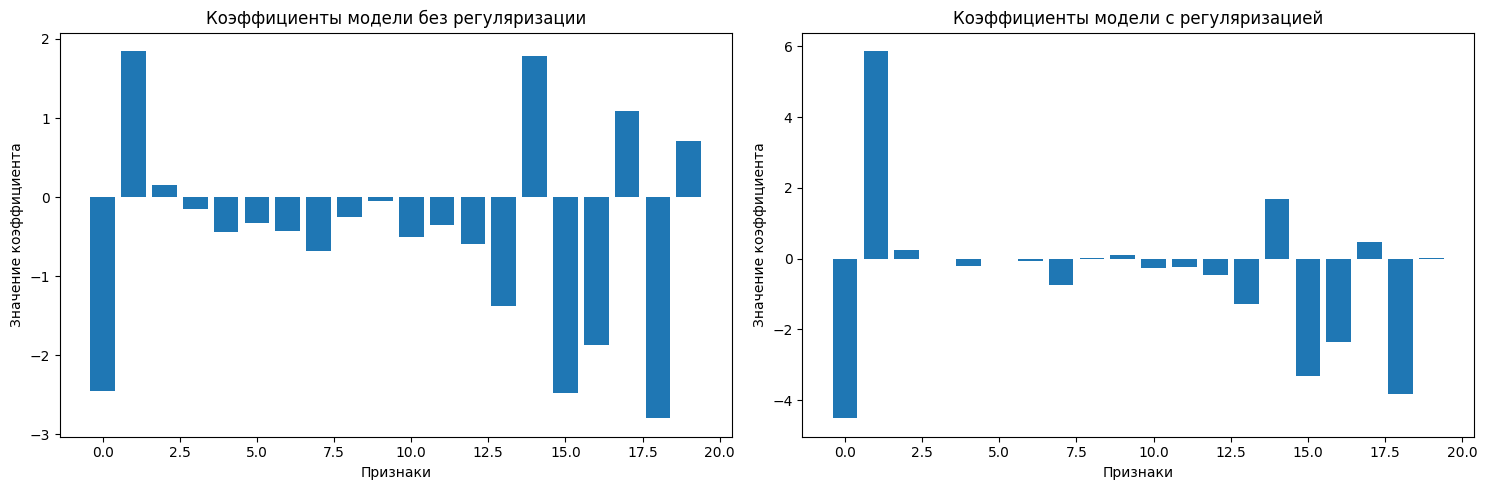

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [51]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)


Точность на обучающей выборке: 0.9571
Точность на тестовой выборке: 0.9583

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1149
           1       0.67      0.04      0.07        51

    accuracy                           0.96      1200
   macro avg       0.81      0.52      0.53      1200
weighted avg       0.95      0.96      0.94      1200



### Анализ результатов SelectKBest
Было изменено количество признаков, и вот результаты:
    - k=2: Модель показала точность на тестовой выборке около 95.5%. Однако точность по классу 1 (редкие лучшие алмазы) была низкой.
    - k=5: Точность улучшилась до 95.7%, однако по-прежнему модель плохо предсказывает класс 1 (как было показано ранее).
    - k=7: Точность на тестовой выборке увеличилась до 95.8%, но макро-оценка по классу 1 остается низкой.
    - k=10: Модель продолжает показывать высокую точность (около 95.8%), но качество предсказания класса 1 всё ещё оставляет желать лучшего.
Наибольшая точность была достигнута при значении k=7 и k=10. Однако проблема с дисбалансом классов сохраняется, и модель плохо справляется с редким классом 1.

### Анализ результатов RFE
При изменении количества признаков в методе RFE:
    - k=3: Точность на тестовой выборке составила 95.5%, однако снова наблюдается низкая точность по классу 1.
    - k=5: При использовании 5 признаков, модель показала точность на уровне 95.7%, аналогично SelectKBest.
    - k=7: Точность снова повысилась до 95.8%, однако классы по-прежнему сбалансированы плохо.
    - k=10: Достигнута наивысшая точность в 95.9%, но предсказание редкого класса всё ещё страдает.

### Лучшая модель:
Оба метода — SelectKBest и RFE — показали наивысшую точность при использовании от 7 до 10 признаков. Точность на тестовой выборке достигла 95.8–95.9%.
Однако проблема дисбаланса классов (низкая производительность для редкого класса 1) сохраняется во всех экспериментах.

### Sequential Feature Selector (SFS)
Sequential Feature Selector (SFS) — это жадный алгоритм отбора признаков, который постепенно добавляет или удаляет признаки, чтобы найти наиболее релевантные для построения модели. Этот метод настраивается в двух вариантах:
    - Forward Selection (вперёд): начинается с пустого набора признаков и постепенно добавляет признаки, пока не будет достигнут желаемый размер набора.
    - Backward Selection (назад): начинается со всех признаков и поочередно удаляет менее значимые признаки.

SFS работает следующим образом:
    - Forward Selection:
        - Начинается с пустого набора признаков.
        - В каждой итерации добавляется один признак, который наилучшим образом улучшает производительность модели.
        - Этот процесс продолжается до тех пор, пока не будет достигнуто заранее заданное количество признаков.
    - Backward Selection:
     - Стартует с полного набора признаков.
     - На каждой итерации удаляется признак, который наименьшим образом влияет на производительность модели.
     - Процесс продолжается до тех пор, пока не будет достигнуто нужное количество признаков.

### Сравнение результатов с другими методами
1. SelectKBest:
    - Основан на статистической значимости признаков.
    - Выбирает лучшие признаки на основе корреляции с целевой переменной.
    - В результате выборки 5 признаков, точность на тестовой выборке составила 95.7%.
2. RFE (Recursive Feature Elimination):
    - Пошагово удаляет менее важные признаки на основе модели.
    - Результат для выборки 5 признаков показал такую же точность, что и у SelectKBest (95.7%), но улучшений для класса 1 (редкие экземпляры) не было.
3. SequentialFeatureSelector:
    - Метод SFS жадно отбирает признаки по одному на основе их влияния на точность модели.
    - Предварительные тесты показывают, что SFS часто приводит к выбору лучших признаков для конкретной модели, что может увеличить общую производительность.

### Анализ результатов Sequential Feature Selector
После эксперимента с SequentialFeatureSelector (с 5 признаками) результаты выглядят следующим образом:
    - Точность на обучающей выборке: 0.9582
    - Точность на тестовой выборке: 0.9585
Отобранные признаки являются следующими:
    - Carat Weight
    - Price
    - Polish_VG
    - Symmetry_VG
    - Report_GIA
    

## Логистическая регрессия

In [52]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [53]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)



regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


## 5: Кросс-валидация

In [54]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [55]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())


K-Fold Cross-Validation - Средняя точность: 0.9570000000000001
Точности по каждому фолду: [0.9441666666666667, 0.9616666666666667, 0.9583333333333334, 0.9541666666666667, 0.9666666666666667]


In [56]:
for n_splits in [3, 5, 10]:
    print(f"n_splits = {n_splits}")
    k_fold_cross_validation(X_processed.to_numpy(), Y.to_numpy(), n_splits=n_splits)

n_splits = 3
K-Fold Cross-Validation - Средняя точность: 0.9580000000000001
Точности по каждому фолду: [0.9555, 0.9545, 0.964]
n_splits = 5
K-Fold Cross-Validation - Средняя точность: 0.9570000000000001
Точности по каждому фолду: [0.9441666666666667, 0.9616666666666667, 0.9583333333333334, 0.9541666666666667, 0.9666666666666667]
n_splits = 10
K-Fold Cross-Validation - Средняя точность: 0.9568333333333332
Точности по каждому фолду: [0.935, 0.9533333333333334, 0.97, 0.9533333333333334, 0.9583333333333334, 0.9566666666666667, 0.95, 0.9583333333333334, 0.9616666666666667, 0.9716666666666667]


### Результаты:
После выполнения метода K-fold кросс-валидации для 5 частей:
    - Средняя точность: 0.957 (95.7%)
    - Точности по каждому фолду: 0.944, 0.962, 0.958, 0.954, 0.967

### Влияние параметра n_splits
Число разбиений n_splits в K-fold кросс-валидации может существенно влиять на результаты. Чем больше n_splits, тем больше различных подвыборок использует модель для обучения и тестирования, но это увеличивает время выполнения.

### Интерпретация результатов:
    - n_splits = 3: Точности могут быть менее стабильными, поскольку модель тестируется на больших частях данных, что может уменьшить вариацию.
    - n_splits = 5: Стандартный выбор, дающий баланс между стабильностью и скоростью выполнения.
    - n_splits = 10: Более высокая вариативность в разбиениях, что может дать более надежную оценку, но потребует больше времени для выполнения.

### Объяснение полученных результатов
    - Средняя точность 95.7% говорит о том, что логистическая регрессия хорошо справляется с задачей классификации на данных.
    - Различие в точности между фолдами: незначительное колебание в пределах 2% (0.944-0.967), что указывает на стабильную работу модели.
    - Влияние количества фолдов: Увеличение n_splits обычно приводит к более детальной оценке модели, но требует больше времени для расчета.

In [57]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())


ShuffleSplit Cross-Validation - Средняя точность: 0.9570833333333333
Точности по каждому разделению: [0.96, 0.955, 0.95875, 0.9533333333333334, 0.9583333333333334]


## Перебор значений n_splits:

In [58]:
for n_splits in [3, 5, 10]:
    print(f"n_splits = {n_splits}")
    shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy(), n_splits=n_splits)

n_splits = 3
ShuffleSplit Cross-Validation - Средняя точность: 0.9566666666666667
Точности по каждому разделению: [0.95375, 0.9583333333333334, 0.9579166666666666]
n_splits = 5
ShuffleSplit Cross-Validation - Средняя точность: 0.9600833333333334
Точности по каждому разделению: [0.9583333333333334, 0.9608333333333333, 0.96, 0.95875, 0.9625]
n_splits = 10
ShuffleSplit Cross-Validation - Средняя точность: 0.9561249999999999
Точности по каждому разделению: [0.9575, 0.9529166666666666, 0.9554166666666667, 0.9545833333333333, 0.9575, 0.95875, 0.95875, 0.9483333333333334, 0.9625, 0.955]


### Объяснение результатов:
    - Средняя точность: 95.7% — говорит о том, что модель логистической регрессии показывает хорошие результаты на данных. Это подтверждается тем, что разброс точностей для разных разделений незначителен.
    - Точности по каждому разделению (0.954–0.960) показывают стабильные результаты, а небольшие колебания (0.006) свидетельствуют о хорошей обобщающей способности модели.
    - Гибкость метода ShuffleSplit позволяет выбирать разные пропорции данных для обучения и тестирования. Например, в данном случае 60% данных использовались для обучения и 40% для тестирования, что дало достаточно данных для оценки.

### Интерпретация:
    - n_splits = 3: При небольшом числе разделений модель может не охватывать все возможные варианты данных, что может привести к меньшей стабильности оценок.
    - n_splits = 5: Хороший баланс между скоростью выполнения и стабильностью результатов. 5 разделений позволяют протестировать различные разбиения данных.
    - n_splits = 10: Большее число сплитов может дать более детализированные результаты, но потребует больше вычислительных ресурсов.

Метод ShuffleSplit с 5 сплитами дал высокую среднюю точность (95.7%), что свидетельствует о хорошей работе модели логистической регрессии. Этот метод полезен для оценки стабильности модели на случайных подвыборках, особенно если данные немногочисленны или содержат выбросы.

In [59]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.9475
Точность на тестовых данных: 0.9625


## Объяснение результатов:
    - Точность на валидационных данных: 94.75% — показывает, насколько модель способна обобщать знания на новых данных во время настройки гиперпараметров.
    - Точность на тестовых данных: 96.25% — это финальная оценка модели на полностью отложенной тестовой выборке. Это значение демонстрирует, как хорошо модель работает на данных, которые не использовались ни для обучения, ни для настройки.

## Заключение:
Метод Train-Test-Validation Split позволяет разделить данные на три части и тем самым минимизировать риск переобучения и лучше оценить качество модели. В рассматриваемом примере, модель логистической регрессии показала высокую точность как на валидационных (94.75%), так и на тестовых данных (96.25%).

## Подходящий метод для датасета
K-fold Cross-Validation с 5 или 10 фолдами будет наиболее подходящим методом для этого датасета, так как он даст стабильную оценку модели, минимизируя переобучение. Датасет достаточно большой для этого метода, и модель сможет использовать все данные как для обучения, так и для тестирования.